#  Recurrent Neural Network

# Part 1 - Data Preprocessing

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
sc

MinMaxScaler()

In [7]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Creating a data stracture with 60 timesteps and 1 output

In [8]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1198, 60)

In [10]:
len(X_train)

1198

In [11]:
X_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [12]:
len(y_train)

1198

In [13]:
y_train[0]
# type(y_train[0])

0.08627874097775134

Reshaping

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train.shape

(1198, 60, 1)

In [16]:
X_train[0, 0:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

# Part 2 - Building the RNN
Importing the keras libraries and packages

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

initialising the RNN,
Adding a third LSTM layer and some Dropout regularisation,
Adding the output layer,
Compiling the RNN

In [18]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

Fitting the RNN to the Training set

In [20]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 103ms/step - loss: 0.0548 - accuracy: 0.0017
Epoch 2/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0068 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0053 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0052 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0048 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0052 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0050 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0043 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0047 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0043 - accur

38/38 [==============================] - 4s 113ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 82/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0018 - accuracy: 0.0017
Epoch 83/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 84/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 85/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 86/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0020 - accuracy: 0.0017
Epoch 87/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 88/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 89/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 90/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0015 - accuracy: 

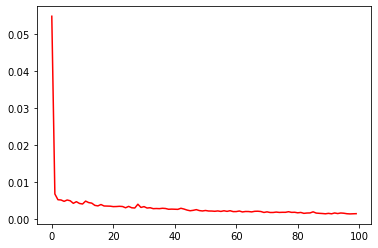

In [29]:
loss = history.history['loss']
plt.plot(loss, c='r')
plt.show()

# Making the predictions and visualizing the results

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.head()

In [ ]:
real_stock_price[:5]

In [ ]:
dataset_total = pd.concat( (dataset_train['Open'], dataset_test['Open']), axis=0)

In [ ]:
dataset_total.head()

In [ ]:
print(len(dataset_train))
print(len(dataset_test))
print(len(dataset_total))

In [ ]:
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [ ]:
inputs

In [ ]:
type(inputs)

In [ ]:
inputs.shape

In [ ]:
inputs = inputs.reshape(-1,1)

In [ ]:
inputs.shape

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
inputs[:5]

In [ ]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

In [ ]:
X_test[0]

In [ ]:
X_test = np.array(X_test)

In [ ]:
X_test[0]

In [ ]:
X_test.shape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
type(predicted_stock_price)

In [ ]:
plt.plot(real_stock_price, c='r', label='Real Google Stock Price')
plt.plot(predicted_stock_price, c='b', label='Predicted Google Stock Price')
plt.legend()
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.show()

In [ ]:
regressor.evaluate(predicted_stock_price,real_stock_price)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))